In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
#Load dataset
dataset = pd.read_csv('Iris.csv')

#Show five records from our loaded dataset
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Describe the data!
#Id - discrete
#SepalLength to PetalWidthCm - continuous
#Species - nominal 

In [4]:
#Gets Index 1 to 5 Columns, 4 Columns should be in X. Training Variables
X = dataset.iloc[:, 1:5]

#Gets everything after the 5th column, Target Variables
y = dataset.iloc[:, 5]

In [5]:
#Import for LabeLEncoder
from sklearn.preprocessing import LabelEncoder

#Transform the string categorical data to integers

#Initialize the LabelEncoder object
le = LabelEncoder()

#Fit the categorical string data to unique integers per class(species)
le.fit(y)

#Now that we have the categorical data fit we can transform the y to the integers we assigned for each class(species)
y = le.transform(y)

#You can do this in one line as well by doing
#y = le.fit_transform(y)

In [6]:
#Now our data is prepared for the training/test set split - test sets are usually 30% or 20%
from sklearn.model_selection import train_test_split

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.3, random_state=42)

#Now we are ready to implement the machine learning algo

In [7]:
#Distance Metric Function - Euclidean Distance also known as L2 distance
def euclidean_distance(training_set, test_instance):
    #Number of samples in our training set
    n_samples = training_set.shape[0]
    
    #Array to hold our distances
    distances = np.zeros(n_samples, dtype=np.float64)
    
    #euclidean distance calculation
    for i in range(n_samples):
        distances[i] = np.sqrt(np.sum(np.square(test_instance - training_set[i])))
    
    return distances

In [8]:
#Algo Class
class MyKNeighborsClassifier():
    #Class constructor
    def __init__(self, neighbors=5):
        self.n_neighbors=neighbors
        
    #Preparing the data
    def fit(self, X, y):
        n_samples = X.shape[0]
        
        #Validations
        if(self.n_neighbors > n_samples):
            raise ValueError("Number of neighbors can't exceed the number of samples in the training set!")
        if(n_samples != y.shape[0]):
            raise ValueError("Number of samples in X and y have to be equal!")
            
        #Hold all the possible classes 
        self.classes_ = np.unique(y)
        
        self.X = np.array(X)
        self.y = np.array(y)
        
    def pred_from_neighbors(self, training_set, labels, test_instance, k):
        distances = euclidean_distance(training_set, test_instance)
        
        #Concates the distances to lables 1 to 1
        #Example - 
        # 1.6 Iris-setosa
        # 5.2 Iris-versicolor
        # 8.2 Iris-virginica
        # But for each X
        distances = sp.c_[distances, labels]
        
        #Sort the distances by distances, smallest to largest(Makes selecting easier)
        sorted_distances = distances[distances[:,0].argsort()]
        
        #Select k number of distances from the top of our sorted distances
        targets = sorted_distances[0:k,1]
        
        #Get the classes and counts for the classes
        unique, counts = np.unique(targets , return_counts=True)
        
        #Get the class that had the most neighbors
        #np.argmax will get the class integer assigned by the LabelEncoder with the most counts(neighbors), 
        return(unique[np.argmax(counts)])
    
    def predict(self, X_Test):
        #Make X_Test a numpy array
        X_Test = np.array(X_Test)
        
        #Number of predictions(rows in our array) we are making and the number of features(columns in our array)
        n_predictions, n_features = X_Test.shape
        
        #array to hold the predictions for each row
        predictions = np.zeros(n_predictions, dtype=int)
        
        #Loop to get a prediction for each row
        for i in range(n_predictions):
            #calculate a single prediction
            predictions[i] = self.pred_from_neighbors(self.X, self.y, X_Test[i, :], self.n_neighbors)
        
        return(predictions)
        

In [9]:
#Instantiate the learning model with k = 4
classifier = MyKNeighborsClassifier(neighbors=4)
#Fit the data 
classifier.fit(X_Train, y_Train)
#Making Predictions!
preds = classifier.predict(X_Test)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_Test, preds) * 100
print("Model Accuracy: {0}%".format(round(accuracy, 2)))

Model Accuracy: 100.0%


In [11]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


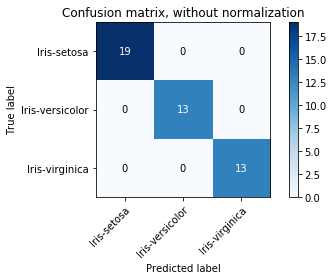

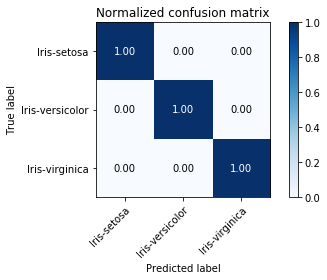

In [12]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_Test, preds, classes=le.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_Test, preds, classes=le.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()